In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [101]:
AgeGender = pd.read_csv("AgeAndGender.csv")


In [102]:
AgeGender.shape


(613, 14)

In [103]:

AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='NSW'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='QLD'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='ACT'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='VIC'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='TAS'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='SA '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='NT '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='WA '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='Grand Total'].index)

In [104]:
AgeGender.shape



(604, 14)

In [105]:
AgeGen = AgeGender.reset_index()


In [106]:
F = []
M = []
Elec = []
for i in range(1,len(AgeGen), 4):
        F.append(AgeGen['TOTAL'][i]/AgeGen['TOTAL'][i-1])
        M.append(AgeGen['TOTAL'][i+1]/AgeGen['TOTAL'][i-1])
        Elec.append(AgeGen['Unnamed: 0'][i-1])

In [107]:
Females = pd.DataFrame(F)
Males = pd.DataFrame(M)
Electorates = pd.DataFrame(Elec)

In [108]:
Gender1 = {'Electorate': [], 'Female': [], 'Male': []}

In [109]:
a = [Electorates, Females, Males]


In [110]:
b = np.reshape(a, (3,151))


In [111]:
Gender = pd.DataFrame(b)


In [112]:
Gender = Gender.T


In [113]:
Gender.columns = ['Electorate', 'Female', 'Male']


In [114]:
Gender

,Electorate,Female,Male
0,BANKS,0.515785,0.484111
1,BARTON,0.507321,0.492432
2,BENNELONG,0.508882,0.490934
3,BEROWRA,0.511321,0.488585
4,BLAXLAND,0.503785,0.496177
...,...,...,...
146,BEAN,0.518102,0.481677
147,CANBERRA,0.510196,0.489322
148,FENNER,0.509424,0.490441
149,LINGIARI,0.5041,0.4955


In [115]:
df1 = pd.DataFrame(Gender)

In [116]:
df1 = df1.sort_values('Electorate')
df1

,Electorate,Female,Male
131,ADELAIDE,0.509012,0.490799
47,ASTON,0.513685,0.486152
48,BALLARAT,0.521747,0.478009
0,BANKS,0.515785,0.484111
132,BARKER,0.506875,0.493032
...,...,...,...
45,WERRIWA,0.511283,0.488649
46,WHITLAM,0.517401,0.48249
113,WIDE BAY,0.51211,0.487834
84,WILLS,0.518711,0.48006


In [117]:
df2 = df1.reset_index(drop=True)
df2.shape

(151, 3)

In [118]:
df1 = pd.DataFrame(Gender)
df1[21:40]

,Electorate,Female,Male
21,KINGSFORD SMITH,0.519223,0.480453
22,LINDSAY,0.511738,0.488119
23,LYNE,0.512228,0.487578
24,MACARTHUR,0.512094,0.487864
25,MACKELLAR,0.515794,0.484134
26,MACQUARIE,0.514388,0.485436
27,MCMAHON,0.509822,0.490113
28,MITCHELL,0.511938,0.487962
29,NEW ENGLAND,0.513775,0.486118
30,NEWCASTLE,0.50969,0.490123


In [119]:
Income = pd.read_csv("IncomeByElectorate.csv",encoding='Latin1')


In [120]:
Income.head()
Income.shape

(150, 2)

In [121]:
df = pd.DataFrame(Income)
df['Electorate'] = df['Electorate'].str.upper()
df1['Electorate'] = df1['Electorate'].str.strip()
df

,Electorate,Income
0,BRADFIELD,70893.0
1,NORTH SYDNEY,69788.0
2,WENTWORTH,68367.0
3,HIGGINS,63313.0
4,WARRINGAH,62857.0
...,...,...
145,RICHMOND,30772.0
146,BONYTHON,30525.0
147,PAGE,30402.0
148,FAIRFAX,30288.0


In [122]:
Data_full = df1.merge(df, how = 'inner', on = ['Electorate'])


In [123]:
Data_full

,Electorate,Female,Male,Income
0,BANKS,0.515785,0.484111,39853.0
1,BARTON,0.507321,0.492432,39844.0
2,BENNELONG,0.508882,0.490934,44952.0
3,BEROWRA,0.511321,0.488585,49811.0
4,BLAXLAND,0.503785,0.496177,33915.0
...,...,...,...,...
125,BASS,0.518861,0.481009,32997.0
126,BRADDON,0.517932,0.481942,32006.0
127,FRANKLIN,0.524305,0.475526,34158.0
128,LYONS,0.508317,0.49157,31295.0


In [124]:
AgeGender = pd.read_csv("AgeAndGender.csv")
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='NSW'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='QLD'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='ACT'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='VIC'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='TAS'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='SA '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='NT '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='WA '].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='Grand Total'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='Female'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='Male'].index)
AgeGender = AgeGender.drop(AgeGender[AgeGender['Unnamed: 0']=='Indeterminate/Unknown'].index)
AgeGender = AgeGender.reset_index()

In [125]:
MeanAge = []
for i in range(0,len(AgeGender)):
    MeanAge.append((AgeGender['18-19'][i]*37/2+AgeGender['20-24'][i]*22+AgeGender['25-29'][i]*27+AgeGender['30-34'][i]*32+AgeGender['35-39'][i]*37+AgeGender['40-44'][i]*42+AgeGender['45-49'][i]*47+AgeGender['50-54'][i]*52+AgeGender['55-59'][i]*57+AgeGender['60-64'][i]*62+AgeGender['65-69'][i]*67+AgeGender['70+'][i]*80)/AgeGender['TOTAL'][i]) 

In [126]:
MeanAge1 = {'Electorate': Elec, 'Average Age': MeanAge}
MeanAge = pd.DataFrame(MeanAge1)

In [127]:
MeanAge

,Electorate,Average Age
0,BANKS,49.718227
1,BARTON,48.898017
2,BENNELONG,48.719712
3,BEROWRA,50.094019
4,BLAXLAND,47.651354
...,...,...
146,BEAN,48.247173
147,CANBERRA,46.901848
148,FENNER,44.841353
149,LINGIARI,44.687380


In [128]:
df11=pd.DataFrame(MeanAge)
df11['Electorate'] = df11['Electorate'].str.strip()

In [129]:
Data1 = Data_full.merge(df11, how = 'inner', on = 'Electorate')
Data1

,Electorate,Female,Male,Income,Average Age
0,BANKS,0.515785,0.484111,39853.0,49.718227
1,BARTON,0.507321,0.492432,39844.0,48.898017
2,BENNELONG,0.508882,0.490934,44952.0,48.719712
3,BEROWRA,0.511321,0.488585,49811.0,50.094019
4,BLAXLAND,0.503785,0.496177,33915.0,47.651354
...,...,...,...,...,...
125,BASS,0.518861,0.481009,32997.0,51.381866
126,BRADDON,0.517932,0.481942,32006.0,52.393241
127,FRANKLIN,0.524305,0.475526,34158.0,51.731046
128,LYONS,0.508317,0.49157,31295.0,52.190875


In [130]:
WinningParty = pd.read_csv("Winner.csv")

In [131]:
WinningParty

,2019 Federal Election House of,Column_2-T,Column_3-T,Column_4-T,Column_5-T,Column_6-T,Column_7-T,Column_8-T,Column_9-T,Column_10-T
0,DivisionNm,DivisionID,StateAb,PartyAb,Liberal/National Coalition Votes,Liberal/National Coalition Percentage,Australian Labor Party Votes,Australian Labor Party Percentage,TotalVotes,Swing
1,Adelaide,179,SA,ALP,44819,41.82,62362,58.18,107181,0.12
2,Aston,197,VIC,LP,60180,60.13,39910,39.87,100090,2.72
3,Ballarat,198,VIC,ALP,40068,39.02,62615,60.98,102683,-3.62
4,Banks,103,NSW,LP,51609,56.26,40121,43.74,91730,4.82
...,...,...,...,...,...,...,...,...,...,...
147,Werriwa,153,NSW,ALP,41959,44.53,52270,55.47,94229,2.73
148,Whitlam,150,NSW,ALP,40130,39.09,62541,60.91,102671,39.09
149,Wide Bay,178,QLD,LNP,59279,63.15,34593,36.85,93872,4.96
150,Wills,234,VIC,ALP,23202,24.15,72888,75.85,96090,-4.18


In [132]:
Winner = WinningParty.drop(['Column_3-T','Column_2-T','Column_5-T','Column_6-T','Column_7-T','Column_8-T','Column_9-T','Column_10-T'], axis = 1)

In [133]:
Winner

,2019 Federal Election House of,Column_4-T
0,DivisionNm,PartyAb
1,Adelaide,ALP
2,Aston,LP
3,Ballarat,ALP
4,Banks,LP
...,...,...
147,Werriwa,ALP
148,Whitlam,ALP
149,Wide Bay,LNP
150,Wills,ALP


In [134]:
Winner = Winner.rename(columns={'2019 Federal Election House of':'Electorate'})
Winner = Winner.rename(columns={'Column_4-T':'Preference'})
Winner = Winner.drop(Winner[Winner['Electorate']=='DivisionNm'].index)
Winner

,Electorate,Preference
1,Adelaide,ALP
2,Aston,LP
3,Ballarat,ALP
4,Banks,LP
5,Barker,LP
...,...,...
147,Werriwa,ALP
148,Whitlam,ALP
149,Wide Bay,LNP
150,Wills,ALP


In [135]:
Winner['Electorate'] = Winner['Electorate'].str.upper()
Winner['Electorate'] = Winner['Electorate'].str.strip()

In [136]:
Winner['Preference'] = Winner['Preference'].replace(['LP'],'LNP')
Winner['Preference'] = Winner['Preference'].replace(['NP'],'LNP')

In [137]:
Data = Data1.merge(Winner, how = 'inner', on = 'Electorate')

In [138]:
Data

,Electorate,Female,Male,Income,Average Age,Preference
0,BANKS,0.515785,0.484111,39853.0,49.718227,LNP
1,BARTON,0.507321,0.492432,39844.0,48.898017,ALP
2,BENNELONG,0.508882,0.490934,44952.0,48.719712,LNP
3,BEROWRA,0.511321,0.488585,49811.0,50.094019,LNP
4,BLAXLAND,0.503785,0.496177,33915.0,47.651354,ALP
...,...,...,...,...,...,...
125,BASS,0.518861,0.481009,32997.0,51.381866,LNP
126,BRADDON,0.517932,0.481942,32006.0,52.393241,LNP
127,FRANKLIN,0.524305,0.475526,34158.0,51.731046,ALP
128,LYONS,0.508317,0.49157,31295.0,52.190875,ALP


# Data Visualisation

In [145]:
Data.Preference.value_counts()

LNP    74
ALP    56
Name: Preference, dtype: int64

In [149]:
Data.describe()

,Income,Average Age
count,130.000000,130.000000
mean,37796.015385,49.398847
std,7813.379024,2.526263
min,29895.000000,42.997229
25%,33377.000000,47.679729
50%,35490.500000,49.442815
75%,38500.000000,51.219018
max,70893.000000,55.778299


In [155]:
print("Correlation between age and income: ", Data['Average Age'].corr(Data['Income']))


Correlation between age and income:  -0.17319971166234813


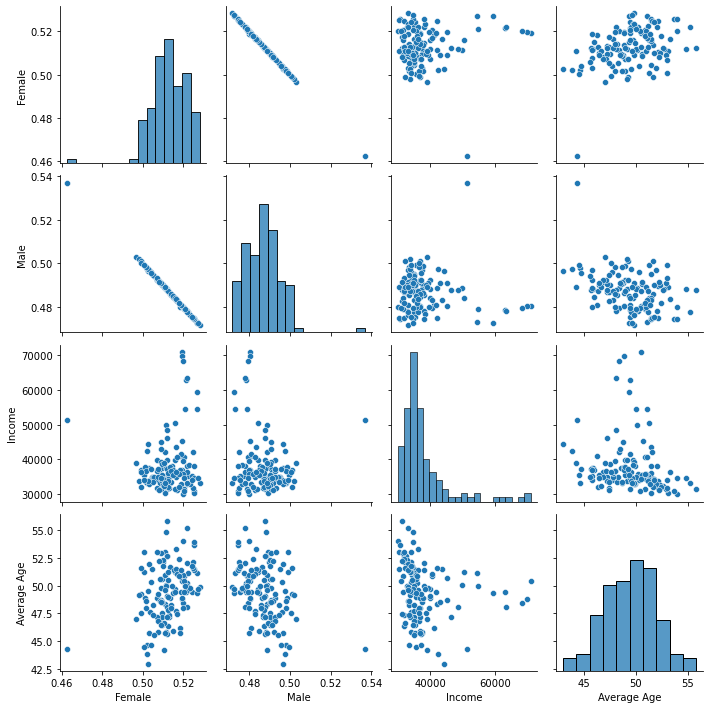

In [139]:
g=sns.pairplot(Data)

In [42]:
#Make comment on it

In [ ]:
sns.regplot(x='')